# No-Show Appointment ( Project 2 )

### Table of Contents

- Introduction
- Data Wrangling
- Exploratory Data Analysis
- Conclusion

## Introduction

In this project, I will analyze a dataset of information acquired from more than 100k medical appointments in Brazil to respond to the query of whether or not patients show up. 

### Dataset:

Download data from Kaggle.

#### Questions which we want to answer in this project :

Q1: Which gender shows up for their appointment more?

Q2: Are the patients who received SMS more likely not to miss the appointment?

Q3: Are people with scholarships more or less likely to miss appointments?

Q4: Does the neighbourhood affects the show-up of the patient?

In [3]:
# - import needed packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# - read the csv file
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

### Data Inspection 

First, we will check the data properties and inspection.
after this we will provide what we need to cleaning it.

In [4]:
# - show first 5 rows to check the data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# - check how many (row) and (column) in data
df.shape

(110527, 14)

In [6]:
# - provide statistics calculations 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
# - check the data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [8]:
# - check if there is a null values 
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [9]:
# - check if there is a duplicated row 
df.duplicated().sum()

0

In [10]:
# - check the unique values in each column  
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

We have finished the data inspection and are ready to clean it!

### Data Cleaning

1- we will change the datatype for (ScheduledDay , AppointmentDay) from string to date.
2- we can see the age contains a negative value '-1' which is not correct 
   the min should be at least '0', so we will delete it.
3- change the column names into lower case and fix the spelling mistakes.

In [11]:
# - change the column names into lower case and standardize the spelling 

df.columns = df.columns.str.lower()

df.rename(columns ={'hipertension':'hypertension', 'handcap':'handicap', 'no-show' : 'no_show'}, inplace = True)

In [12]:
# - update datatype 

df.scheduledday = pd.to_datetime(df.scheduledday)
df.appointmentday = pd.to_datetime(df.appointmentday)

In [13]:
# - drop the negative value in age

df.drop(index=df.loc[df['age']==-1].index,inplace=True)


In [14]:
# - we will drop patientID and AppointmentID since they Contains unique values and aren't valuable for our analysis 

df.drop(['patientid', 'appointmentid'], axis = 1, inplace = True)

In [15]:
# - check the data

df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [16]:
# - we will change 'no_show' from Yes or No into 1 or 0 to make it easier to calculate the int in statistics 
df['no_show'] = df['no_show'].map({'Yes': 1, 'No': 0})

In [17]:
# - now we will take a look at data
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


We have finished the data cleaning and are ready to explore it!

### Data Exploratory 

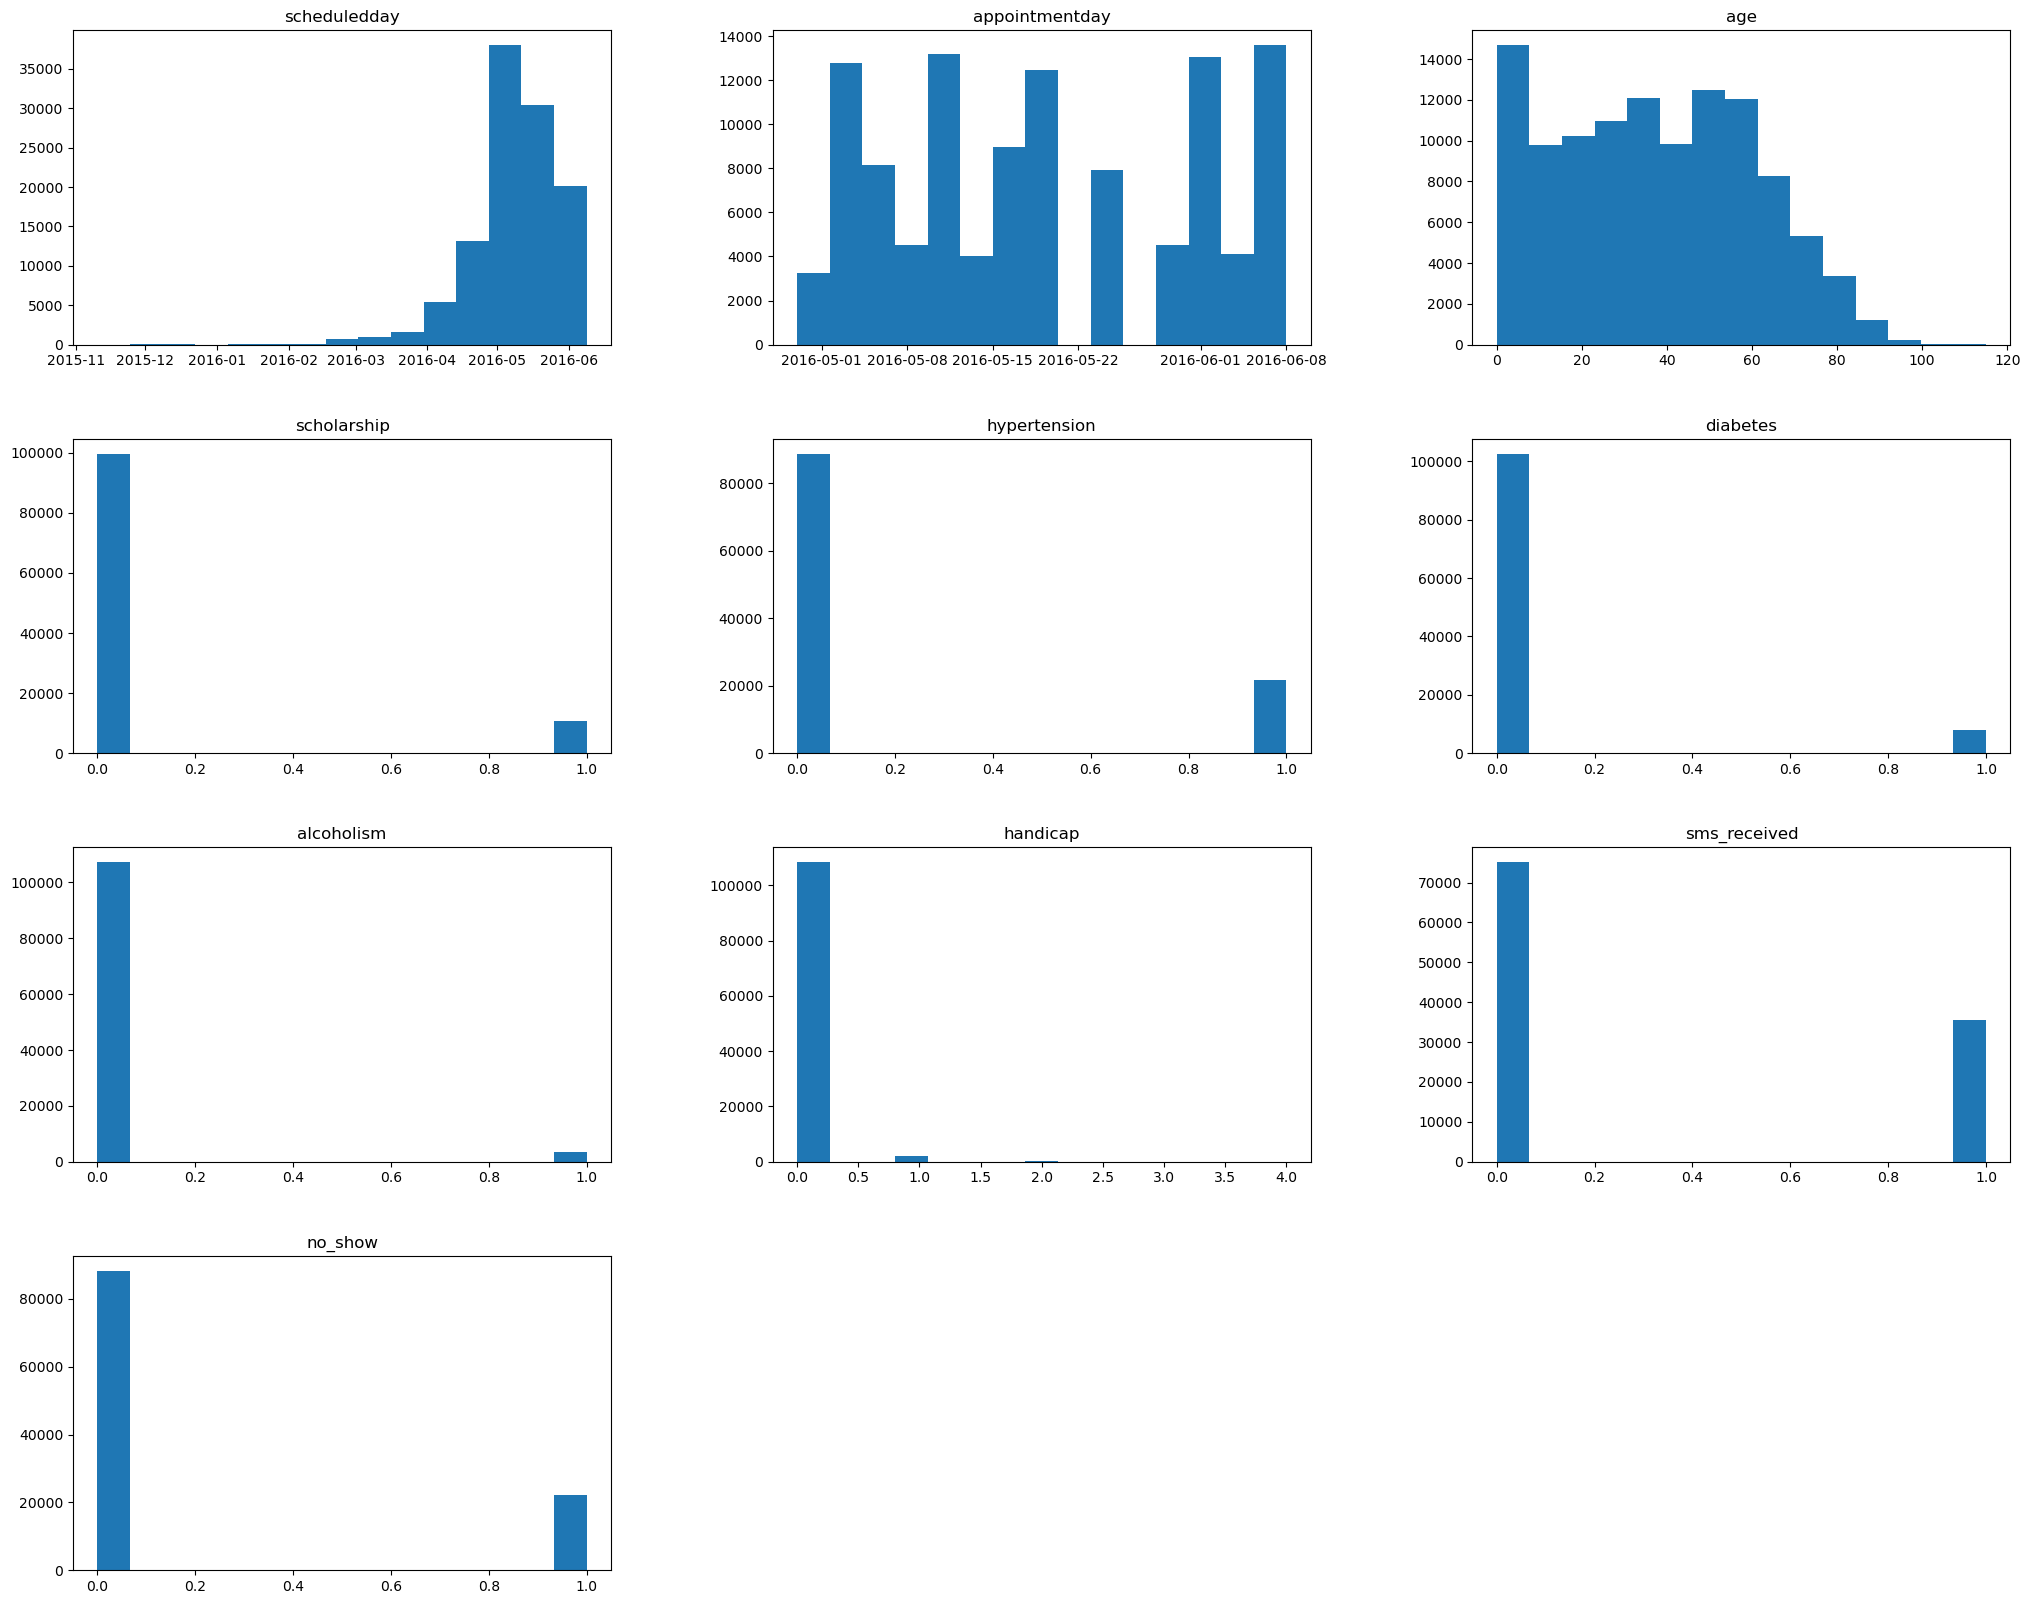

In [135]:
# - First Let’s take a look about all data

df.hist( figsize=(25,20), grid= False, bins = 15);

In [18]:
# - mask for the rows where patients attend for their appointments and the rows where they do not arrive

showup = df['no_show'] == False
no_showup = df['no_show'] == True

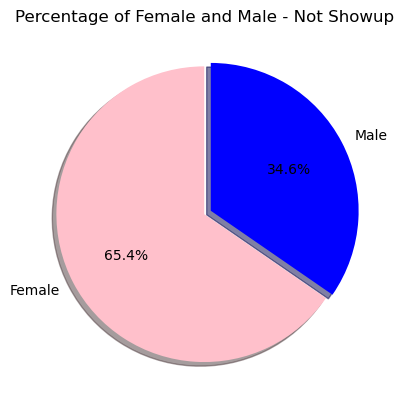

In [54]:
# - here a percentage of gender who most likely don't showup for appointments 

gender_f = df.loc[(df['gender'] == 'F') & (df['no_show'] == 1)]['no_show'].count()
gender_m = df.loc[(df['gender'] == 'M') & (df['no_show'] == 1)]['no_show'].count()

plt.pie([gender_f,gender_m], explode = (0,0.05), labels=['Female','Male'], colors = ("pink", "blue"),autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Percentage of Female and Male - Not Showup',fontsize=12);


We can see that the female are more likely to shown by around 31% higher than male

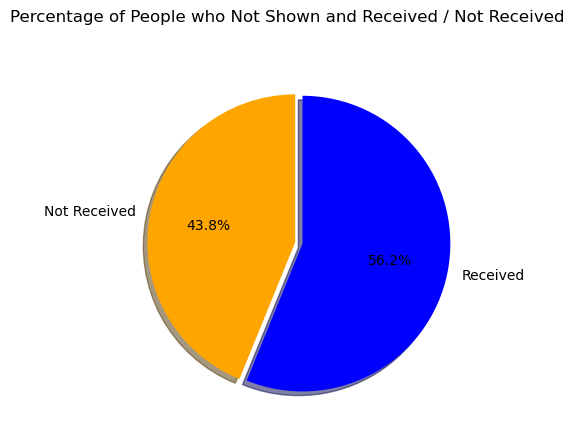

In [53]:
# - here a percentage of gender who most likely don't showup for appointments

sms_nr = df.loc[(df['sms_received'] == 1) & (df['no_show'] == 1)]['no_show'].count()
sms_r = df.loc[(df['sms_received'] == 0) & (df['no_show'] == 1)]['no_show'].count()

plt.pie([sms_nr,sms_r],explode=(0,0.05),labels=['Not Received','Received'],colors = ("orange", "blue"),autopct='%1.1f%%',shadow=True,startangle=90);
plt.suptitle('Percentage of People who Not Shown and Received / Not Received',fontsize=12);


We can see that the people who received SMS are more likely to shown by around 13% higher than who not received

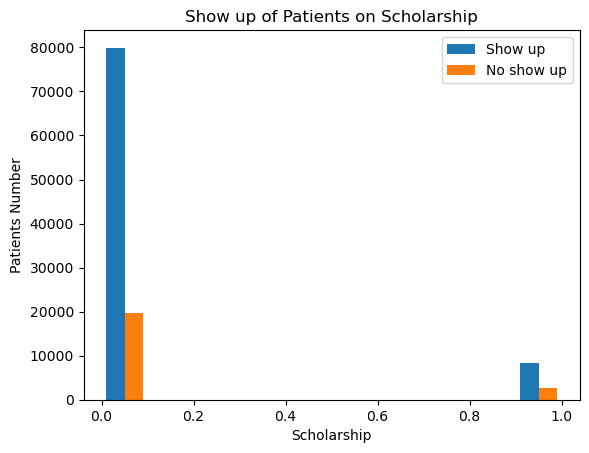

In [123]:
# - here a visual relationship between receiving a scholarship and show up for appointment

scholar_s = df.scholarship[showup]
scholar_ns = df.scholarship[no_showup]

plt.hist((scholar_s ,scholar_ns))
plt.legend(['Show up','No show up'])
plt.title('Show up of Patients on Scholarship', fontsize=12)
plt.xlabel('Scholarship')
plt.ylabel('Patients Number')
plt.grid(False)


We can see that 20% of the patients who were not covered by the scholarship did not arrive for their appointments.

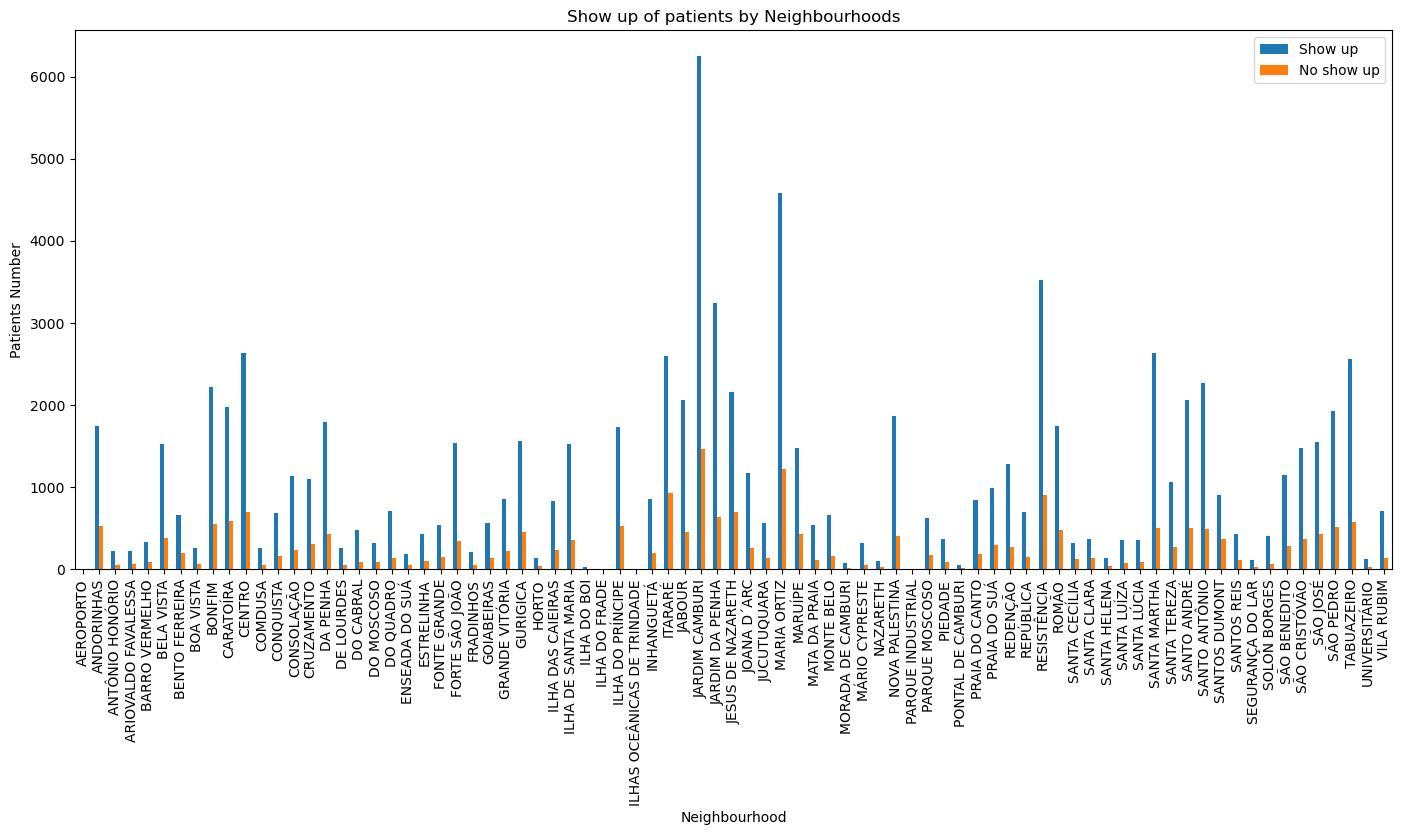

In [148]:
nbh_show = df.groupby('neighbourhood')['no_show'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(17,7))
plt.legend(['Show up','No show up'])
plt.title("Show up of patients by Neighbourhoods", fontsize=12)
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number');

We can see that there are neighbourhoods more likely to show up by around 60% higher than other neighbourhoods, 'JARDIM' neighbourhood has the highest rate of showing up for the appointment.

# Conclusion 

#### Result :

1- Females are more likely to show by around 31% more than males.

2- The patients who received SMS are more likely not to miss the appointment by around 13% higher than those who have not received it.

3- We can see that 20% of the patients not covered by the scholarship are more likely to miss their appointments.

4- We can see that there are neighbourhoods more likely to show up by around 60% higher than other neighbourhoods, 'JARDIM' neighborhood has the highest rate of showing up for the appointment.